In [64]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from math import sin, cos, sqrt, atan2, radians


In [65]:
def get_distance(addr1, addr2):
    return _get_distance(addr1['latitude'], addr1['longitude'], addr2['latitude'], addr2['longitude'])
    
def _get_distance(lon1, lat1, lon2, lat2):
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [66]:
ADDRESSES_PER_ROUTE = 12

df = pd.read_csv('cords.csv')
df['visited'] = False
df.head(3)

number_of_routes = math.ceil(df['id'].count()/ADDRESSES_PER_ROUTE)
initial_groups = df['id'].sample(n=number_of_routes)
# df.loc[df.id.isin(initial_groups.values)] = 1

# this can be done without a loop
for i in range(len(initial_groups.values)):
    df.loc[df['id'] == initial_groups.values[i], 'visited'] = True

groups = [ [group] for group in initial_groups.array ]

# pd.set_option('display.max_rows', df.shape[0]+1)

print(groups)
# df

[[428], [492], [409], [444], [404], [410], [422], [521], [476], [518], [509], [473], [552]]


In [67]:
groups = [ [group] for group in initial_groups.array ]

not_yet_visited = df[df.visited == False]['id']

for address_id in not_yet_visited[:]:
    current_address = df[df.id==address_id]
#     print(current_address)
#     print(address_id)
    
    min_distance = math.inf
    potential_group = None
    
    for group in groups:
        if len(group) < ADDRESSES_PER_ROUTE:
            for temp_address_id in group:
                temp_address = df[df.id==temp_address_id]
                distance = get_distance(temp_address, current_address)
                if distance < min_distance:
                    min_distance = distance
                    potential_group = group
#     print(min_distance)
#     if min_distance < 0.5:
#         potential_group.append(address_id)
        
for g in groups:
    print(g)

[428]
[492]
[409]
[444]
[404]
[410]
[422]
[521]
[476]
[518]
[509]
[473]
[552]


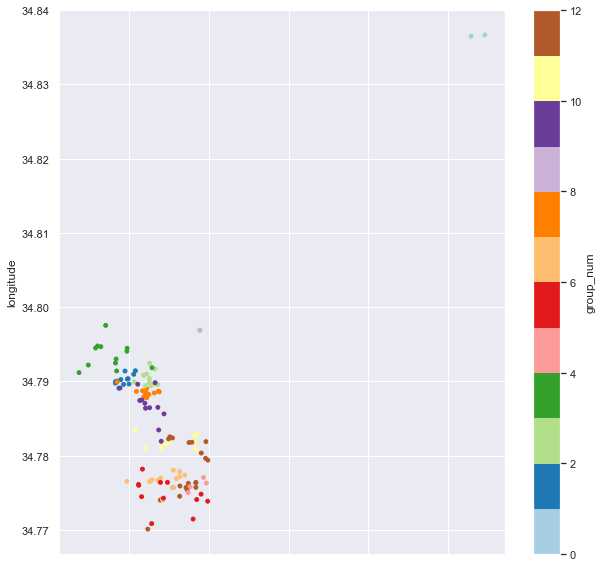

In [68]:
group_num = 0

for group in groups:
    for address_id in group:
        df.loc[df['id'] == address_id, 'group_num'] = group_num
    group_num += 1


# X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=25, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.5)
# df
plt.rcParams["figure.figsize"]=10,10
filtered_df.plot.scatter(x = 'latitude', y = 'longitude', c='group_num', s=15, cmap='Paired')